In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

### PRE CORRIDA

In [2]:
def ver_dispersion(y_test, prediction, nombre):
    plt.figure(figsize=(10, 10))
    plt.scatter(y_test, prediction, alpha=0.2)
    plt.title("Dispersión de " + nombre, fontsize=25)
    plt.ylabel("Predicciones", fontsize=20)
    plt.xlabel("Valores Reales", fontsize=20)
    plt.xticks(rotation=30, fontsize=17, ha="right")
    plt.yticks(fontsize=17)
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
    # Recta x = y
    plt.plot([y_test.min(), y_test.max()], [
             y_test.min(), y_test.max()], "k--", lw=4)
    plt.show()
    return None

In [3]:
ruta_data = "../../data"
ruta_train = ruta_data + "../train.csv"
ruta_test = ruta_data + "../test.csv"
ruta_submits = "../..submits"
ruta_features = ruta_data + "../features/"

In [4]:
train_limpio = pd.read_csv(f"{ruta_data}/train_final.csv")
# test_limpio = pd.read_csv(f"{ruta_data}/test_final.csv")

### CORRIDA DE PRUEBA

In [5]:
X, y = train_limpio.drop(["precio"], axis=1),train_limpio["precio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 100)

#scaling = StandardScaler().fit(X_train)
#X_train2 = scaling.transform(X_train)
#X_train2 = pd.DataFrame(data = X_train2, columns = X.columns)

In [6]:
%%time 
y_train_l = np.log(y_train)
reg = KNeighborsRegressor(n_neighbors = 40, metric = 'minkowski', p = 1, weights = 'distance', n_jobs = -1)
reg.fit(X_train, y_train_l)

Wall time: 33.4 s


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=40, p=1,
                    weights='distance')

In [7]:
%%time 
pred = reg.predict(X_test)
pred = np.exp(pred)

Wall time: 31.5 s


In [8]:
int( round( mean_absolute_error(y_test, pred) ) )

709127

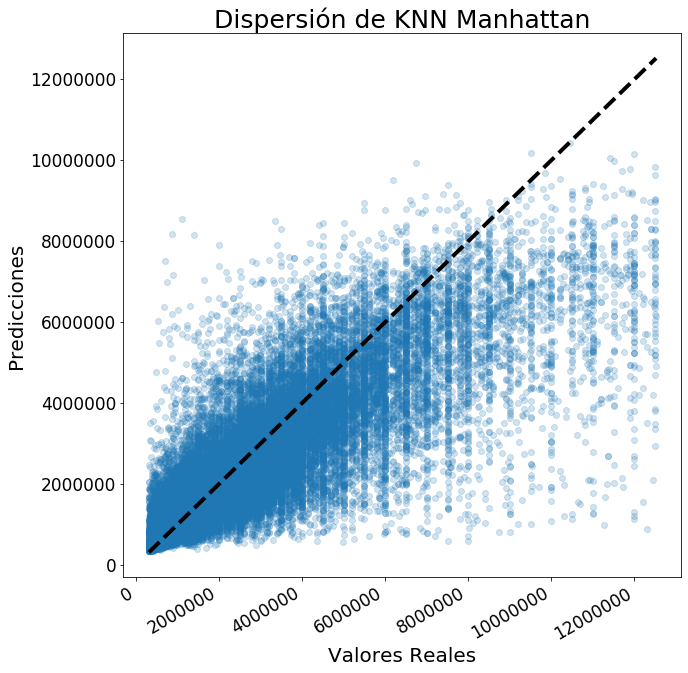

In [11]:
ver_dispersion(y_test, pred, "KNN Manhattan")

In [10]:
detenerse

NameError: name 'detenerse' is not defined

### CORRIDA DE SUBMIT

In [ ]:
%%time
y_l = np.log(y)
reg = #ACA VA EL TRAIN DEL ALGORITMO CORRESPONDIENTE

In [ ]:
%%time 
pred_test = #ACA VA EL TEST DEL ALGORITMO CORRESPONDIENTE
pred_test = np.exp(pred_test)

In [ ]:
ids_test = pd.read_csv(f"{ruta_data}/ids_test.csv")

ids_test["target"] = pred_test

#### Ponele algun nombre al csv

In [ ]:
ids_test.to_csv(f"{ruta_submits}/linear_regression_final.csv",index=False)